## Population, Samples and Descrpitive Stats
- A population refers to the entire group that you want to draw conclusions about
- A sample is the portion of the population that you actually collect data from
- Descriptive statistics are summary statistics that quantitatively describe a variable
- There are various ways to measure the central tendency of a variable, including mean, median and mode
- Dispersion is a measure of how stretched or squeezed the distribution of a variable is
- Continuous data are numerical values that can take on any value within a specified range or interval
- Ordinal data are categorical data with a set order or scale, such as satisfaction ratings
- Nominal data are categorical data without an intrinsic ranking or order



In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
from math import floor
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from scipy import stats
from scipy.stats import yeojohnson
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.formula.api as smf



In [11]:
df = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Eng/houses_to_rent.csv", index_col=0)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [3]:
df2 = df.copy()
print(df2['area'].mean())
df2['area']

151.14391447368422


0       240
1        64
2       443
3        73
4        19
       ... 
6075     50
6076     84
6077     48
6078    160
6079     60
Name: area, Length: 6080, dtype: int64

By looking at the value we get, it seems to be pretty representative of the dataset. This is the aim of descriptive statistics: to find values that are representative of the dataset.
However, the sample mean is not robust in the presence of outliers, which are values that are much smaller or much larger that most other observations.

In [4]:
fig = px.box(df2, y="area")
fig.show()

We can see that 2 values are clearly outliers, we'll remove them so that the mean is a better representation of the data


In [5]:
df2 = df2[~df.isin(df2.nlargest(2,'area'))].dropna(how='all')
fig = px.box(df2, y='area')
fig

Now we will calculate, mean, median, mode, range, statistical dev, variance, Q1, Q3, IQR(Q3 - Q1), upper fence, lower fence

In [10]:
print(df2['area'].mean())
print(df2['area'].median())
print(df2['area'].mode())
print(df2['area'].std())
print(df2['area'].var())
print(df2['area'].max() - df2['area'].min())

145.05051003619613
100.0
0    50.0
Name: area, dtype: float64
128.83480006959047
16598.40570897135
1590.0


In [16]:
areas = np.sort(df2['area'])
Q1 = areas[floor(len(areas) * 0.25)]
Q2 = areas[floor(len(areas) * 0.50)] #same as median
Q3 = areas[floor(len(areas) * 0.75)]
IQR = Q3 - Q1
upperfence = Q3 + (1.5 * IQR)
lowerfence = Q1 - (1.5 * IQR)
print(Q1,Q2,Q3,IQR,upperfence,lowerfence)
fig

58.0 100.0 200.0 142.0 413.0 -155.0


The 1600 point also seems to be an outlier, we can remove it too

In [20]:
df2 = df2[~ df2.isin(df2.nlargest(1,'area'))].dropna(how='all')
fig = px.box(df2,y='area')
fig

#### Types of Data 
- Categorical Data :  data that has a finite number of possible categories we can observe.
- Nominal Data : In the case of country of birth being collected as data, there is no inherent ordering. This type of data is known as nominal data, and is the classification of data such as name, gender and ethnicity.
- Ordinal Data : data is ordered but distance between 2 continuous elements is not constant. 

## Null Values and Imputations
Missing values are when a value is expected in a structured data but none is given. Reasons are -
- Errors in data collection
- Respondents not providing information
- Observations not being recorded

We can either - 
1. Drop the entire variable
2. Drop the missing data points
3. Do nothing
4. Impute the missing value

Types of missing data - 
1. MCAR (missing completely at random) - 
    - The probability of an observation being missing is the same for all the samples
    - E.g. survey respondents accidentally missing questions because they didn't notice them
    - This type of missing data does not bias the inferences made
    - Can impute with mean or simply remove the rows with missing data

2. MAR (Missing at Random) -
    - The probability of an observation missing depends on other observed variables but not the variable itself
    - E.g. a survey question that men are more likely than women to skip
    - This type of missing data introduces some bias
    - Can often be modelled on the basis of the existing data

3. NMAR (not missing at random) -
    - The probability of an observation missing depends on the values of the missing data itself, even after controlling for other observed variables
    - E.g. people with higher incomes are less likely to disclose their income in a survey
    - This type of missing data can introduce significant bias
    - Complex statistical techniques are needed to impute missing values

Methods for Imputing Data - 

- Mean,Mode and median imputation (Normal continous distributed data, categorical data) (introduces bias and increases variance of imputed data)
- Constant Value Imputation (used as a logical default value) (can mess up distribution if incorrectly used)
- Regression Imputation (columns with missing values are treated as dependent variables and run a regression model to predict those missing values)
- K-Nearest Neighbors (KNN) Imputation: KNN uses the k most similar instances (based on some distance metric) to a given data point and calculates the average (for numerical variables) or the mode (for categorical variables) to fill the missing value.
- Multiple Imputation by Chained Equations (MICE): This method performs multiple regressions over random sample of the data, then averages out the predictions to give a more accurate estimate. It's more complex and computationally expensive, but can produce better results.
- Deep Learning: In this approach, a deep learning model is trained to predict missing values, usually for cases where the data is structured (e.g., tables) and where the missing values are categorical. In essence this is the same as the regression approach, but using a deep learning model to approximate the regression function. Datawig is an example of a Python library designed for this purpose.


In [21]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/ec957285-bf30-4e5c-942b-16d3983023f9/nulled_df.csv')
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,NaN,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,NaN,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df) * 100

percentage of null values in each column:


MedInc          5.000000
HouseAge        0.101744
AveRooms       35.000000
AveBedrms      10.000000
Population      5.000000
AveOccup        0.101744
Latitude        0.998062
Longitude      39.001938
MedHouseVal     0.000000
dtype: float64

In [43]:
#longitude column has too many null values, cant drop the rows as it would mean losing 39& of our data, also latitude might be useless without longitude
#lets do more investigation
longitudes = df['Longitude'].unique()
np.sort(longitudes)
#we can see that they are not continuous elements and its hard to impute which element is missing from where
#so we will drop the entire column
df.drop('Longitude',axis=1,inplace=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,NaN,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,NaN,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,NaN,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,NaN,356.0,3.122807,39.49,0.771
20637,NaN,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


We will now impute houseage as it's only missing a short amount of data. First, let's test for normality. We can use the D'Agostino's K^2 Test, or the Kolmogorov-Smirnov test for this, both available under the stats module of the ScipPy library. The tests assume the default situation (aka. the null hypothesis) is that the distribution is not normally distributed. The test provides a way to estimate the probability that this null hypothesis is false, given the data sample we provide. This probability estimate is known as a p-value. A p-value close to zero therefore means the data are normally distributed. The traditional rule of thumb in most STEM subjects is that a p-value of less than 0.05 provides significant evidence for the null hypothesis being false. However, depending on your situation, you may wish to adopt a more stringent p-value.

Statistics=1762.065, p=0.000


<Axes: >

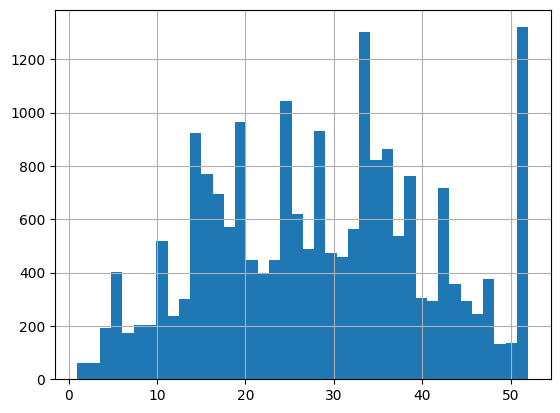

In [47]:
data = df['HouseAge']
# D’Agostino’s K^2 Test
stat, p = normaltest(data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))
#we can also visually represnt and check
df['HouseAge'].hist(bins=40)


As this is a bit of an edge-case, we can use a Quantile-Quantile plot (Q-Q plot) to investigate further. A Q-Q plot is a graphical tool used in statistics to assess if a dataset follows a particular theoretical distribution. It is a scatterplot created by plotting two sets of quantiles against one another - the theoretical quantiles from the chosen distribution on the x-axis, and the actual data quantiles on the y-axis.

28.638488772491392
29.0


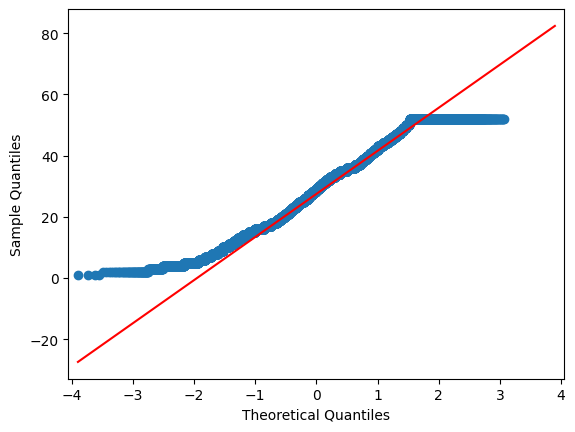

In [51]:
print(df['HouseAge'].mean())
print(df['HouseAge'].median())
# scaleHouseAge: 
qq_plot = qqplot(df['HouseAge'] , scale=1 ,line='q')
pyplot.show()

From the Q-Q plot it is clear that while the data are normally distributed through the middle of the range, there are significant deviations from normality at the upper bound, as no houses are listed as older than 50 years, and at the lower, because the normal distribution would extend into the negative numbers, and the minimum possible age for a house is zero.

In [52]:
#we can impute with mean or median as they're almost the same
df['HouseAge'] = df['HouseAge'].fillna(df['HouseAge'].median())
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,NaN,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,NaN,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,NaN,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,NaN,356.0,3.122807,39.49,0.771
20637,NaN,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


- Most real-world datasets contain null values, and in many data analysis pipelines they will need to be handled
- Approaches for handling nulls in structured data include deleting the row, deleting the entire column, and imputing the missing value
- Random and non-random missing values must be handled differently, with more complex techniques required to impute non-random values
- There are various strategies for imputing data. Deciding which to use depends on the complexity of the underlying data.
- Handling null values is as much art as science, and depends on the decisions and insights of the analyst

## Skewed Data

1. Positive (Right) Skew: In a positively skewed distribution, the right tail (larger numbers) is longer or fatter than the left. In this case, the mean and the median will be greater than the mode.
2. Negative (Left) Skew: In a negatively skewed distribution, the left tail (smaller numbers) is longer or fatter than the right. Here, the mean and the median will be less than the mode.

we can measure the skewness of data in Python using the scipy.stats.skew() function or the pandas.DataFrame.skew() function for a Pandas DataSeries. Positive values indicate a positive skew, negative values indicate a negative skew, and values close to zero suggest no significant skew

Skew of population column is 4.93585822672712
this indicates a strong positive skew


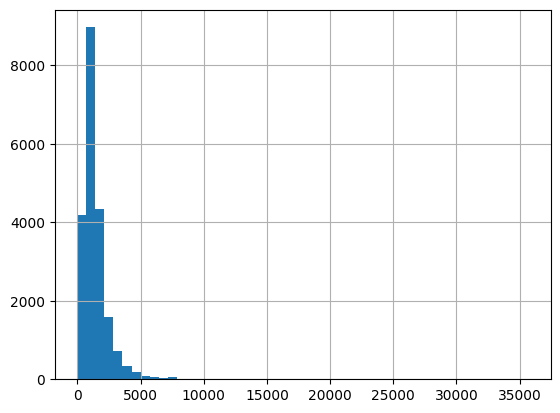

In [54]:
df = fetch_california_housing(as_frame=True).frame
df['Population'].hist(bins=50)
print(f"Skew of population column is {df['Population'].skew()}")
print("this indicates a strong positive skew")

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64


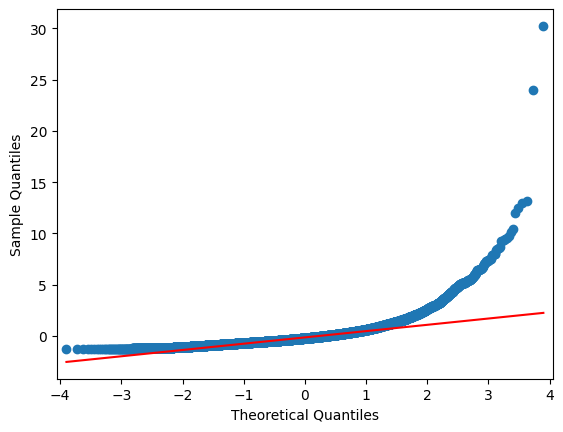

In [56]:
# We can look further into this by looking at the output of df.describe() and by making a Q-Q plot of sample distribution against a theoretical normal distribution
print(df['Population'].describe())

qq_plot = qqplot(df['Population'] , scale=1 ,line='q', fit=True)
pyplot.show()

From these analyses we can confirm that the data are positively skewed, and that this skew is due to both a general tendency for higher values to be over-represented, and because of two very large outliers. Now who do we need to unskew the data? 

- Normalisation - Many statistical techniques (like linear regression, ANOVA, t-tests, etc.) assume that the data follows a normal distribution. This is because the properties of the normal distribution allow for robust statistical inference. If the data is skewed, these techniques may give biased or inefficient results. Transforming the data can help to make it more normally distributed, thus satisfying the assumptions of these techniques.
- Variance Stabilisation - The variance of skewed data tends to increase with the mean. This is problematic for many statistical techniques which assume that the variance is constant (homoscedastic). Transforming the data can help to stabilize the variance, making these techniques more applicable.
- Reduction of the impact of outliers - Skewed data often has outliers that can disproportionately affect the results of an analysis. By transforming the data, the impact of these outliers can be reduced.
- Improving Intepretability - In some cases, transforming the data can make results more interpretable. For example, a log transformation can convert multiplicative relationships into additive ones, and exponential relationship into a linear one.

### The Central Limit Theorem (CLT) :
The Central Limit Theorem (CLT) is a fundamental concept in statistics. It states that if you have a large enough sample size, the sampling distribution of the mean will approach a normal distribution, regardless of the shape of the population distribution. This means that if you draw large enough samples and calculate their means, the distribution of these means will be approximately normal, even if the original data are skewed.
1. Large Samples
If the sample size is large enough (often considered to be over 30 observations, though this depends on the degree of skewness), the CLT suggests that the distribution of sample means will be approximately normal, even if the original data are not. Therefore, even with skewed data or data that are not normally distributed, parametric tests that assume normality can still provide valid results. In such cases, data transformation might not be necessary.

2. Small Samples
If the sample size is small and the data is significantly skewed, standard inferential techniques might be inappropriate as they assume normality of the data or the sampling distribution. In this case, you might need to consider using data transformations to make the data more symmetric, or instead use non-parametric techniques which do not require the normality assumption.

3. Influence of Outliers
Regardless of sample size, if the data contains outliers, these can unduly influence the results of inferential statistics, because many statistical procedures are sensitive to extreme values. In such situations, data transformation can help to minimize the influence of outliers, although an alternative strategy is the direct removal of the outliers.

Methods For correcting Skew -

Log Transorm - 
- This is most commonly used transform for correcting right-skewed data
- Can convert exponential relationships into linear ones
- Reduces the effect of outliers
- Easily done by np.log()
- Data should not have null values
- Handle values at 0 (np.log(0) encounters divide by zero)
- The log transform is one of the most commonly used transforms to handle skewed data. This is because it is good at handling 'count' type data, in which there is a strong rightward skew because the minimum value is 0, but there is no upper bound. By taking the log of each data point, the high-value tail on the right is compressed more than the low-value tail on the left, which can make the distribution more symmetric and closer to a normal distribution.

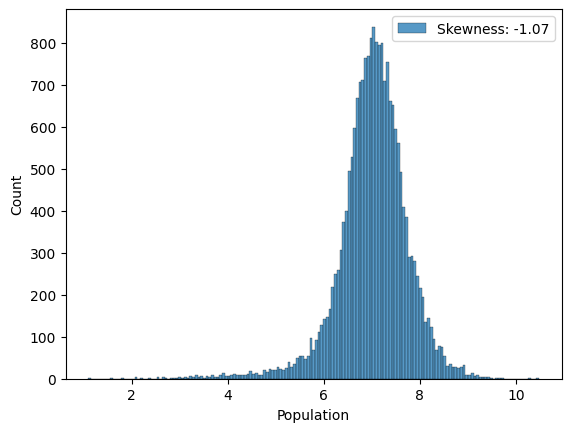

In [57]:
log_population = df["Population"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_population,label="Skewness: %.2f"%(log_population.skew()) )
t.legend()

#### Box-Cox Transform
Data must be positive
Can be optimised via a parameter λ, which allows for a more direct approach to targeting normality
The log transform is a special case of the Box-Cox transform (with λ = 0 )
The Box-Cox transformation is a family of power transformations invented by George Box and David Cox in 1964 to stabilize variance and make a dataset look more like a normal distribution. It is defined as follows:
```
y = (x**λ - 1) / λ,  for λ ≠ 0
y = log(x), for λ = 0
```
The appropriate value for λ is estimated from the data. The goal is to find a λ that makes the output y as close to normally distributed as possible.

The Box-Cox transformation can only be applied to strictly positive data. It can however be applied to data that have occasional zero or negative values by adding a constant to the response before applying the transformation, such that all the values become positive.

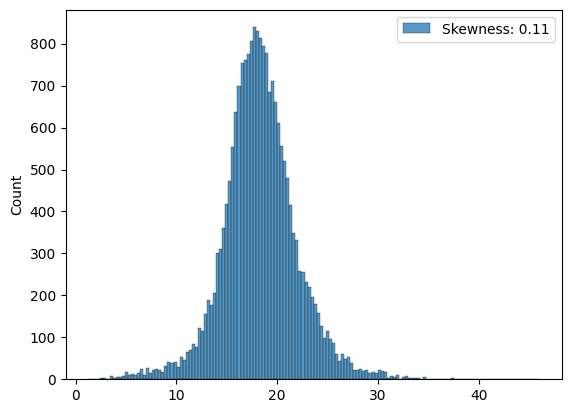

In [60]:
boxcox_population = df["Population"]
boxcox_population= stats.boxcox(boxcox_population)
boxcox_population= pd.Series(boxcox_population[0])
t=sns.histplot(boxcox_population,label="Skewness: %.2f"%(boxcox_population.skew()) )
t.legend()

Generalises the Box-Cox family of transforms to handle negative values
Optimised via a single parameter, per Box-Cox
Useful when the underlying distribution contains both positive and negative values
Unnecessarily complicated for 'count' type data
The Yeo-Johnson transform is a generalisation of the Box-Cox family of transforms to allow the handling of negative values.It is defined as follows:
```
For y (the data) and λ (the transformation parameter):

For y ≥ 0 and λ ≠ 0: ((y^(λ) - 1) / λ)
For y ≥ 0 and λ = 0: log(y)
For y < 0 and λ ≠ 2: -((-y^(2-λ) - 1) / (2 - λ))
For y < 0 and λ = 2: -log(-y)
```
Given that the Yeo-Johnson transformation can handle both positive and negative numbers and the Box-Cox transformation can only handle positive values, you might wonder why you would ever use Box-Cox instead of Yeo-Johnson, given that the latter is more flexible. The Box-Cox transformation is simpler and more straightforward than the Yeo-Johnson transformation. Its formula is easier to understand, and the results can be more intuitive and easier to interpret.

In general, one should use the simplest transformation possible, as every transformation you perform can distort your data, and the fewer and simpler your transformations, the easier it is to keep track of their implications.

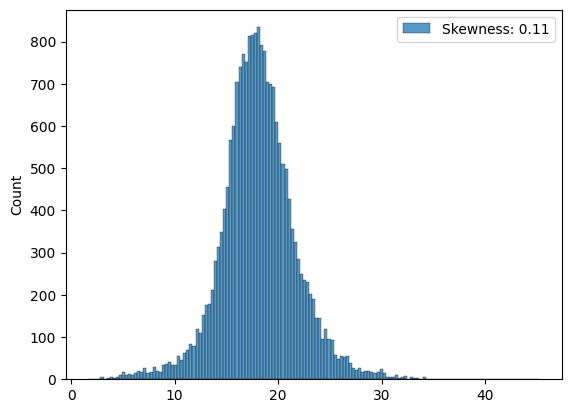

In [62]:
yeojohnson_population = df["Population"]
yeojohnson_population = stats.yeojohnson(yeojohnson_population)
yeojohnson_population= pd.Series(yeojohnson_population[0])
t=sns.histplot(yeojohnson_population,label="Skewness: %.2f"%(yeojohnson_population.skew()) )
t.legend()

- __Skewed__ data are data which are not symmetrically distributed around the mean
- The two main categories are positive (right) skewness and negative (left) skewness
- We can measure skew quantitatively with `scipy.stats.skew()` or `pandas.DataFrame.skew()`
- We can also observe skew using a __Q-Q plot__
- Reasons to transform skewed data include preparing a dataset for machine learning algorithms, and applying parametric tests
- The __Central Limit Theorem__ (CLT) should be considered when deciding whether to transform data for inferential statistics
- Common transforms to correct skewness include the log transform, Box-Cox transforms and Yeo-Johnson transforms

## Influential Points: Outliers and Leverages
Scatter plots , box plots and Q-Q plots are all useful tools for identifying outliers. When fitting a model, scatter plots are preferred as they are bivariate (they map an x value to a y value). When looking at a variable in isolation, boxplots or Q-Q plots provide good outlier detection.
- A datapoint has high leverage if it has an extreme x value. Extreme simply refers to a point that doesn't fall within the expected confines of the data in the x range.
- An outlier is a data point that differs significantly from other observations in the same dataset.extreme y value


In [63]:
df_1 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/1.txt", sep="\t", encoding="utf-16")
df_2 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/2.txt", sep="\t", encoding="utf-16")
df_3 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/3.txt", sep="\t", encoding="utf-16")
df_4 = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/influential/4.txt", sep="\t", encoding="utf-16")
df_list = [df_1, df_2, df_3, df_4]

for df in df_list:
    df.drop("Row", axis=1, inplace=True)
    df.columns = ["YoE", "Salary"] # YoE = Years of Experience

df_1.head()

,YoE,Salary
0,0.10000,-0.0716
1,0.45401,4.1673
2,1.09765,6.5703
3,1.27936,13.8150
4,2.20611,11.4501


In [66]:
rows, cols = 2, 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=("Example 1", "Example 2", "Example 3", "Example 4"))

for i, df in enumerate(df_list):
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(
        go.Scatter(x=df["YoE"], y=df["Salary"], mode="markers"),
        row=row, col=col
    )

fig.update_layout(title_text="Years of Experience vs Salary (x1000)", showlegend=False)
fig.show()

no outliers in EX1, outlier at x=4 ex2, ex3 has a leverage but follows trend so not an outlier, leverage in ex4 

In [67]:
#ex4
df_4_no_outlier = df_4[(df_4["YoE"] != 13) & (df_4["Salary"] != 15)]
px.scatter(df_4_no_outlier, "YoE", "Salary")

In [69]:
import statsmodels.formula.api as smf

## Fit two models: with_outlier and without_outlier.
with_outlier_model = smf.ols("Salary ~ YoE", df_4).fit()
without_outlier_model = smf.ols("Salary ~ YoE", df_4_no_outlier).fit()

## Create a go figure object
fig = go.Figure()

## Plot the x, y datapoints from the dataframe with an outlier. Remember to appropiately name the trace
fig.add_trace(
    go.Scatter(x=df_4["YoE"], y=df_4["Salary"], mode="markers", name="Years of Experience vs Salary (x1000)")
)

## Add a trace, plotting the fitted values from the with_outlier model
fig.add_trace(
    go.Scatter(x=df_4["YoE"], y=with_outlier_model.fittedvalues, name="Regression with outlier")
)

## Add a trace, plotting the fitted values from the without_outlier model
fig.add_trace(
    go.Scatter(x=df_4["YoE"], y=without_outlier_model.fittedvalues, name="Regression without outlier")
)

## Add a title and show the graph
fig.update_layout(title="Example 4: Fitted regression line with and without outlier")
fig.show()

In [70]:
print(with_outlier_model.summary())
print("*"*100)
print(without_outlier_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     23.41
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           0.000114
Time:                        21:00:26   Log-Likelihood:                -78.017
No. Observations:                  21   AIC:                             160.0
Df Residuals:                      19   BIC:                             162.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5046      4.222      2.014      0.0

huge difference in intercept and the y coefficient

In [71]:
df_2_n = df_2[(df_2["YoE"] != 4) & (df_2["Salary"] != 40)]
df_3_n = df_3[(df_3["YoE"] != 14) & (df_3["Salary"] != 68)]

In [72]:
# Example 2
with_outlier_model = smf.ols("Salary ~ YoE", df_2).fit()
without_outlier_model = smf.ols("Salary ~ YoE", df_2_n).fit()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_2["YoE"], y=df_2["Salary"], mode="markers", name="Years of Experience vs Salary (x1000)"))
fig.add_trace(
    go.Scatter(x=df_2["YoE"], y=with_outlier_model.fittedvalues, name="Regression with outlier"))
fig.add_trace(
    go.Scatter(x=df_2["YoE"], y=without_outlier_model.fittedvalues, name="Regression without outlier"))

fig.update_layout(title="Example 2: Fitted regression line with and without outlier")
fig.show()

In [73]:
print("With outlier parameters: \n", with_outlier_model.params)
print("With outlier R2: \t", with_outlier_model.rsquared)

print("\n")
print("Without outlier parameters: \n", without_outlier_model.params)
print("Without outlier R2: \t", without_outlier_model.rsquared)

With outlier parameters: 
 Intercept    2.957638
YoE          5.037345
dtype: float64
With outlier R2: 	 0.9100509522985457


Without outlier parameters: 
 Intercept    1.732178
YoE          5.116869
dtype: float64
Without outlier R2: 	 0.9731681321750607


In [74]:
# Example 3
with_outlier_model = smf.ols("Salary ~ YoE", df_3).fit()
without_outlier_model = smf.ols("Salary ~ YoE", df_3_n).fit()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_3["YoE"], y=df_3["Salary"], mode="markers", name="Years of Experience vs Salary (x1000)"))
fig.add_trace(
    go.Scatter(x=df_3["YoE"], y=with_outlier_model.fittedvalues, name="Regression with outlier"))
fig.add_trace(
    go.Scatter(x=df_3["YoE"], y=without_outlier_model.fittedvalues, name="Regression without outlier"))

fig.update_layout(title="Example 3: Fitted regression line with and without outlier")
fig.show()

In [75]:
print("With outlier parameters: \n", with_outlier_model.params)
print("With outlier R2: \t", with_outlier_model.rsquared)

print("\n")
print("Without outlier parameters: \n", without_outlier_model.params)
print("Without outlier R2: \t", without_outlier_model.rsquared)


With outlier parameters: 
 Intercept    2.467879
YoE          4.927221
dtype: float64
With outlier R2: 	 0.9773929107826496


Without outlier parameters: 
 Intercept    1.732178
YoE          5.116869
dtype: float64
Without outlier R2: 	 0.9731681321750607


- Outliers are dependent variable (y-axis) values that significantly differ from other observations in the dataset.
- Leverages are data points in a statistical model that have the potential to exert strong influence on the estimated parameter, usually by taking extreme values in the independent variable (x-axis).
- Box plots and Q-Q plots are useful for measuring outliers within a single variable
- Scatter plots are useful for identifying outliers in the relationship between two variables.
- Outliers and leverages can exert undue influence over the parameters of a model.

## Collinearity 
At a high level, collinearity occurs when two independent variables are heavily related to each other - to the point where one of the independent variables can be predicted from the others with a very high degree of accuracy. The term multicollinearity refers to a similar situation, but pertaining to a group of more than 2 variables. An example of variables that might exhibit a high degree of collinearity could be "house size in square feet" and "number of rooms in the house." These two variables are likely to be highly correlated because a larger house (in terms of square footage) will generally have more rooms. This would be an example of imperfect collinearity. Other variables might be perfectly collinear, for example a person's height in cm vs a person's height in inches.

In [76]:
student_df = pd.read_csv("https://aicore-files.s3.amazonaws.com/Data-Science/student_marks.tsv", delimiter="\t")
student_df = student_df.drop(["Student", "GPA"], axis=1)
student_df.columns = ["marks", "IQ", "study_hrs"]

sleep_hours = np.random.normal(7.5, 1.5, 50)
student_df["sleep_hrs"] = sleep_hours
student_df.head(10)

,marks,IQ,study_hrs,sleep_hrs
0,100,125,30,7.690982
1,95,104,40,7.129540
2,92,110,25,3.503354
3,90,105,20,8.644402
4,85,100,20,4.866795
5,80,100,20,7.289041
6,78,95,15,9.790871
7,75,95,10,7.503245
8,72,85,0,7.483903
9,65,90,5,8.293107


In [77]:
px.imshow(student_df.corr(), title="Correlation heatmap of student dataframe")

In [78]:

## Fit a linear regression model to try and predict study_hrs from marks and IQ
model0 = smf.ols("study_hrs ~ marks + IQ", student_df).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              study_hrs   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     55.27
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.52e-13
Time:                        00:50:43   Log-Likelihood:                -155.29
No. Observations:                  50   AIC:                             316.6
Df Residuals:                      47   BIC:                             322.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1155      3.318     -3.350      0.002     -17.791      -4.440
marks          0.3181      0.165      1.924      0.060      -0.015       0.651
IQ             0.0452      0.160      0.282      0.779      -0.277       0.368
==============================================================================
Omnibus:                        5.861   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.724
Skew:                           0.329   Prob(JB):                       0.0347
Kurtosis:                       4.671   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Despite our correlation plot showing that that both `marks` and `IQ` have strong correlation with `study_hrs`, both of these values are coming up as insignificant (at a p-value threshold of `0.05`). In non-mathematical terms, this happens because both marks and IQ are 'fighting' for an effect on `study_hrs`, and the model is struggling to identify which variable is more significant because they're moving in the same direction.

Importantly - and this is a point that we'll pick up more on later - the coefficients and `R^2` values are still reliable. In fact, the only part which becomes 'unreliable' are the columns following `coef`.

Our correlation heatmap earlier on is one of the two ways that we can check for collinearity. We saw that marks and IQ are heavily correlated with each other and hence we can say that they are collinear. 

A question you're probably thinking is "how much correlation is too much"? And yes, that's a valid question. Unfortunately there's no law or strict rule which can answer this for us (although -1, and 1 definitely is "too much"). However, a loose rule of thumb that anything above 0.9 is probably starting to be too much - although some might suggest that anything under 0.95 isn't a problem. Personally, I'd exercise some caution and think (not drop) about the variables in a bit more depth if I see their value above 0.85.

The second method is something known as the *Variation Inflation Factor*, or VIF. This method is more powerful than the aforementioned as we fit a linear regression model on one of our independent variables against all the other exogenous variables. Mathematically, for one variable `X_1`:
$$
\hat{X_1} = \beta_0 + \beta_1(X_2) + \beta_2(X_3) + ...
$$

Subsequently, we'd work out the VIF, which uses the `R^2` obtained from the model:
$$
\text{VIF} \equiv \frac{1}{1-R^2_1}
$$

The higher the `R^2`, the higher the VIF. This process would be carried out for all the independent variables we would be considering, and we'd store the VIF score obtained for each one. If the VIF for one of our variables is too high (10 is a common rule of thumb), then we can say that that variable is being adequately explained by our other variables, and it would a valid assumption to drop that variable.

In [79]:
model1 = smf.ols("study_hrs ~ marks + IQ + sleep_hrs", student_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              study_hrs   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     37.34
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           2.20e-12
Time:                        00:52:25   Log-Likelihood:                -154.68
No. Observations:                  50   AIC:                             317.4
Df Residuals:                      46   BIC:                             325.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5547      5.408     -1.212      0.232     -17.441       4.332
marks          0.3472      0.167      2.075      0.044       0.010       0.684
IQ             0.0201      0.162      0.124      0.902      -0.305       0.346
sleep_hrs     -0.5930      0.556     -1.067      0.292      -1.712       0.526
==============================================================================
Omnibus:                        6.423   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.928
Skew:                           0.344   Prob(JB):                       0.0190
Kurtosis:                       4.825   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
## Code up three models which, in turn, model one of the exogenous variables against the other two.
exog_marks_model = smf.ols("marks ~ IQ + sleep_hrs", student_df).fit()
exog_iq_model = smf.ols("IQ ~ marks + sleep_hrs", student_df).fit()
exog_sleep_model = smf.ols("sleep_hrs ~ marks + IQ", student_df).fit()

## print the R^2 for each model
print("R^2 for model: \n Marks: {} \n IQ: {} \n Sleep: {}".format(exog_marks_model.rsquared, 
                                                                  exog_iq_model.rsquared, 
                                                                  exog_sleep_model.rsquared))

R^2 for model: 
 Marks: 0.9573692527648768 
 IQ: 0.9571268452727214 
 Sleep: 0.03144240233791962


In [81]:
## Code up a VIF function
def VIF(r2):
    return 1/(1-r2)

## Work out the VIF scores for each of the models
vif_marks = VIF(exog_marks_model.rsquared)
vif_iq = VIF(exog_iq_model.rsquared)
vif_sleep = VIF(exog_sleep_model.rsquared)

## print the VIF scores
print("VIF scores: \n Marks: {}, \n IQ: {} \n Sleep: {}".format(vif_marks, vif_iq, vif_sleep))

VIF scores: 
 Marks: 23.457247757930624, 
 IQ: 23.324619015351747 
 Sleep: 1.032463120844662


- Collinearity is a term that describes a high degree of correlation between two independent (exogenous) variables
- MultiCollinearity refers to the same concept, but for three or more independent variables
- Correlation heatmaps are a useful way to identify collinear variables
- Variation Inflation Factor is another method for identifying collinearity
- Too much collinearity between two variables can cause each one's contribution to a statistical model to be under-counted
- There is no strict rule for how much collinearity is too much, but a rule of thumb of 0.9 is often used